Primero queremos leer y graficar los datos pertenecientes a la funcion luminosidad de galaxias obtenida por Blanton et al. (2001).

Quiero explorar el espacio de parametros

In [264]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [265]:
datos=pd.read_csv('/home/camila/Documentos/practico1_astrometria/repositorio/practico4/datos_Blanton2001.csv')
datos

,MAG,PHI,error_inf,error_sup
0,-23.183,0.000003,0.000002,0.000003
1,-23.020,0.000005,0.000003,0.000005
2,-22.870,0.000017,0.000005,0.000009
3,-22.698,0.000035,0.000009,0.000010
4,-22.565,0.000082,0.000024,0.000023
5,-22.411,0.000122,0.000017,0.000020
6,-22.248,0.000241,0.000034,0.000040
7,-22.096,0.000328,0.000038,0.000043
8,-21.942,0.000504,0.000059,0.000084
9,-21.793,0.000933,0.000133,0.000091


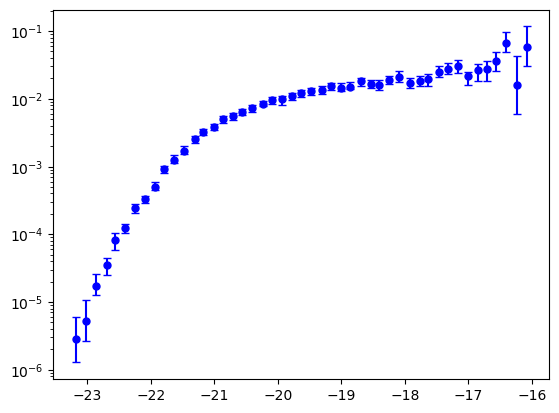

In [266]:
x=datos['MAG']
y=datos['PHI']
error_sup= datos['error_sup']
error_inf= datos['error_inf']
#Los datos de error estan invertidos 

plt.errorbar(x=x,y=y,yerr=[error_inf,error_sup],fmt='ob',ms = 5,  capsize=3)
plt.yscale('log')
plt.show()

Funcion de likehood $L=\prod \frac{1}{\sigma*sqrt(2*pi)}\exp(\frac{(y-y_(model))²}{2*\sigma²})$ 

Funcion  $\log(L)=A-\sum (y-y_(model))²/2*\sigma²$

Funcion probabilidad posterior $log(p(\phi|d,m))=\log(L)+\log(P(\phi,m))-log(p(d|m))$

Vamos a modelar la funcion schechter primero para 

In [267]:
#Defino la funcion schechter
def schechter(M,phi0,a0,M0):
    a=(0.4)*np.log(10)*phi0
    b=10**((-0.4)*(M-M0)*(a0+1))
    c=np.exp(-10**(-0.4*(M-M0)))
    fun=(a*b*c)
    return(fun)

<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_92095/1133145756.py:6: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi(M_r)$')


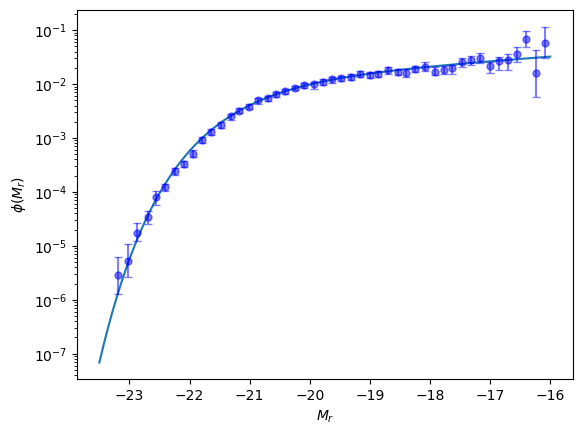

In [268]:
M1=np.linspace(-23.5,-16,100)
plt.plot(M1,schechter(M=M1,phi0=1.46e-2,a0=-1.20,M0=-20.83))
plt.errorbar(x=x,y=y,yerr=[error_inf,error_sup],fmt='ob',ms = 5,  capsize=3,alpha=0.5)
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$\phi(M_r)$')
plt.show()

Para explorar cómo cada parámetro afecta al ajuste del modelo de Schechter, puedes realizar lo siguiente:

Ajustar un parámetro a la vez: Podemos fijar todos los parámetros excepto uno y variar ese único parámetro en un rango determinado. Esto te permitirá ver cómo cambia la forma de la función de luminosidad (es decir, cómo afecta el parámetro al modelo).

Visualizar las variaciones: Para cada parámetro, se puede graficar el modelo de Schechter con el parámetro varíando mientras los otros se mantienen constantes, y observar cómo la curva cambia en respuesta.

<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_92095/1933796411.py:11: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi(M_r)$')


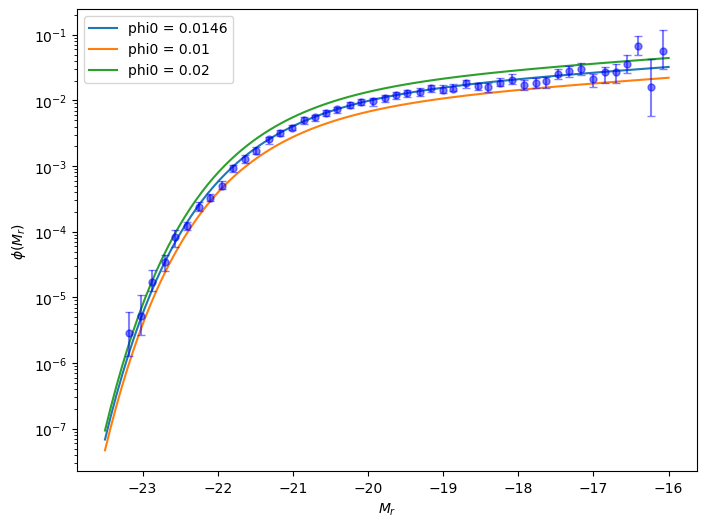

In [269]:
phi0_values = [1.46e-2, 1.0e-2, 2.0e-2]  # Diferentes valores para phi0
M1 = np.linspace(-23.5, -16, 100)

plt.figure(figsize=(8,6))
for phi0_val in phi0_values:
    plt.plot(M1, schechter(M=M1, phi0=phi0_val, a0=-1.20, M0=-20.83), label=f'phi0 = {phi0_val}')

plt.errorbar(x=x, y=y, yerr=[error_inf, error_sup], fmt='ob', ms=5, capsize=3, alpha=0.5)
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$\phi(M_r)$')
plt.legend()
plt.show()


<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_92095/2425257006.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi(M_r)$')


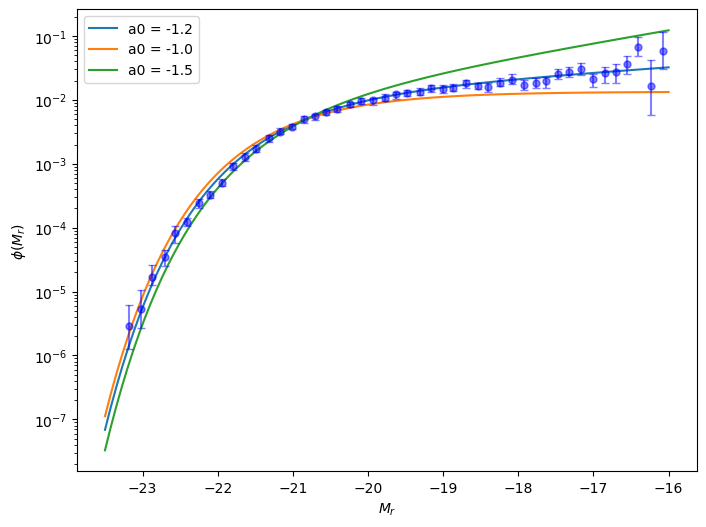

In [270]:
a0_values = [-1.20, -1.0, -1.5]  # Diferentes valores para a0

plt.figure(figsize=(8,6))
for a0_val in a0_values:
    plt.plot(M1, schechter(M=M1, phi0=1.46e-2, a0=a0_val, M0=-20.83), label=f'a0 = {a0_val}')

plt.errorbar(x=x, y=y, yerr=[error_inf, error_sup], fmt='ob', ms=5, capsize=3, alpha=0.5)
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$\phi(M_r)$')
plt.legend()
plt.show()


<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_92095/855279916.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi(M_r)$')


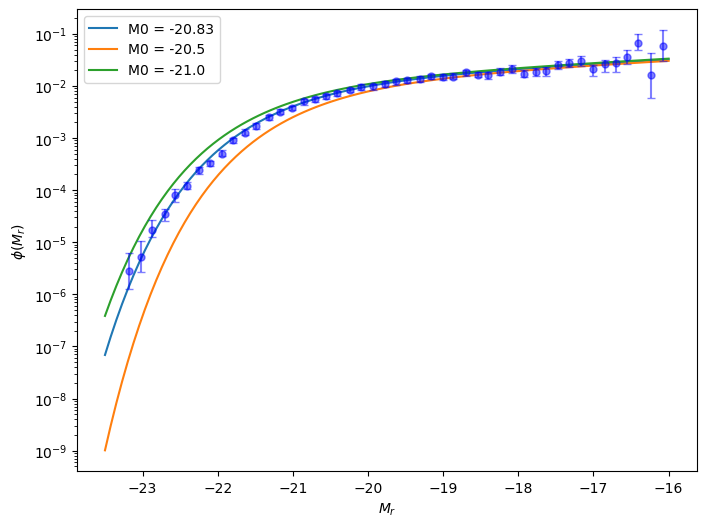

In [271]:
M0_values = [-20.83, -20.5, -21.0]  # Diferentes valores para M0

plt.figure(figsize=(8,6))
for M0_val in M0_values:
    plt.plot(M1, schechter(M=M1, phi0=1.46e-2, a0=-1.20, M0=M0_val), label=f'M0 = {M0_val}')

plt.errorbar(x=x, y=y, yerr=[error_inf, error_sup], fmt='ob', ms=5, capsize=3, alpha=0.5)
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$\phi(M_r)$')
plt.legend()
plt.show()


phi0: Cambiar este parámetro afecta la altura de la curva, es decir, cómo de densa es la distribución de galaxias en las magnitudes más brillantes.
a0: Este parámetro controla la pendiente de la función, determinando cómo decrece la densidad de galaxias con magnitudes más brillantes.
M0: Al modificar M0, cambiarás la posición de la "bajada" o la "curvatura" de la curva en el gráfico, ya que esto ajusta la magnitud característica de la distribución.

#Ahora definimos la funcion likehood, prior y probabilidad posterios

In [272]:
sigma= np.abs((datos['error_sup'] + datos['error_inf'])/2) 

In [273]:
def log_likelihood(y, M, phi0, a0, M0, sigma):
    # Calculamos el modelo de Schechter para cada valor de M
    y_model = schechter(M, phi0, a0, M0)
    
    # Calculamos la log-verosimilitud
    logL = -0.5 * np.sum(((y - y_model)**2)/(2*sigma**2))  # La constante A está incluida en la normalización
    return logL

In [274]:
logL = log_likelihood(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=-20.83, sigma=sigma)
print(f"Log-verosimilitud: {logL}")

Log-verosimilitud: -7.429689979766102


In [275]:
log_likelihood(y=datos['PHI'], M=datos['MAG'], phi0=0.03, a0=-1.9, M0=-22, sigma=sigma) # Prueba con otros valores

-388139.81384240964

La función de log-verosimilitud que has definido está diseñada para ser minimizada durante el proceso de ajuste de parámetros. Este tipo de formulación de la log-verosimilitud está basado en una distribución normal (o gaussiana) de los residuos. La forma general de la log-verosimilitud para un ajuste de parámetros en modelos de este tipo es siempre negativa, ya que la log-verosimilitud se construye a partir de un error cuadrático, que se minimiza

In [276]:
def prior(phi0, a0, M0,phi0lim, M0lim, alim):
    
    if (phi0lim[0]<=phi0) & (phi0<=phi0lim[1]) & (M0lim[0]<=M0) & (M0<=M0lim[1]) & (alim[0]<=a0) & (a0<=alim[1]):
        return 1.0  # Valor constante para la distribución plana
    else:
        return 0.0  # Cero fuera del rango

In [277]:
# Elegimos rangos razonables basados en la literatura y el comportamiento de los datos
phi0lim = [1e-3, 1e-1]  # Valor de phi0 entre 1e-3 y 1e-1
M0lim = [-22, -19]  # Magnitud característica entre -22 y -19
alim = [-2, -0.5]  # Valor de a0 entre -2 y -0.5

In [278]:
phi0 = 1.46e-2
a0 = -1.20
M0 = -20.83

prior_value = prior(phi0, a0,M0,phi0lim, M0lim, alim)
print(f"Prior: {prior_value}")


Prior: 1.0


In [279]:
#prueba prior
phi0 = 1.46e-2
a0 = -1.20
M0 = -22.5

prior_value = prior(phi0, a0,M0,phi0lim, M0lim, alim)
print(f"Prior: {prior_value}")

Prior: 0.0


Funcion probabilidad posterior $log(p(\phi|d,m))=\log(L)+\log(P(\phi,m))-log(p(d|m))$

In [280]:
#A continuacion utilizamos el teorema de Bayes para definir la probabilidad posterior
def prob_post(y, M, phi0, a0, M0, sigma,phi0lim, M0lim, alim):
    log_pos=log_likelihood(y, M, phi0, a0, M0, sigma)+np.log(prior(phi0, a0, M0,phi0lim, M0lim, alim))
    return(log_pos)

In [281]:
# Llamada a la función para calcular la probabilidad posterior
prob_post(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=-20.83, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)

-7.429689979766102

In [282]:
#La llamamos con otros valores 
prob_post(y=datos['PHI'], M=datos['MAG'], phi0=2.9E-2, a0=-1.2, M0=-20, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)

-187.74526663594233

In [283]:
prob_post_value_1 = prob_post(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=-20.83, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)
prob_post_value_2 = prob_post(y=datos['PHI'], M=datos['MAG'], phi0=2.9E-2, a0=-1.2, M0=-22, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)

print(f"Probabilidad posterior 1: {prob_post_value_1}")
print(f"Probabilidad posterior 2: {prob_post_value_2}")

Probabilidad posterior 1: -7.429689979766102
Probabilidad posterior 2: -226326.32145711713


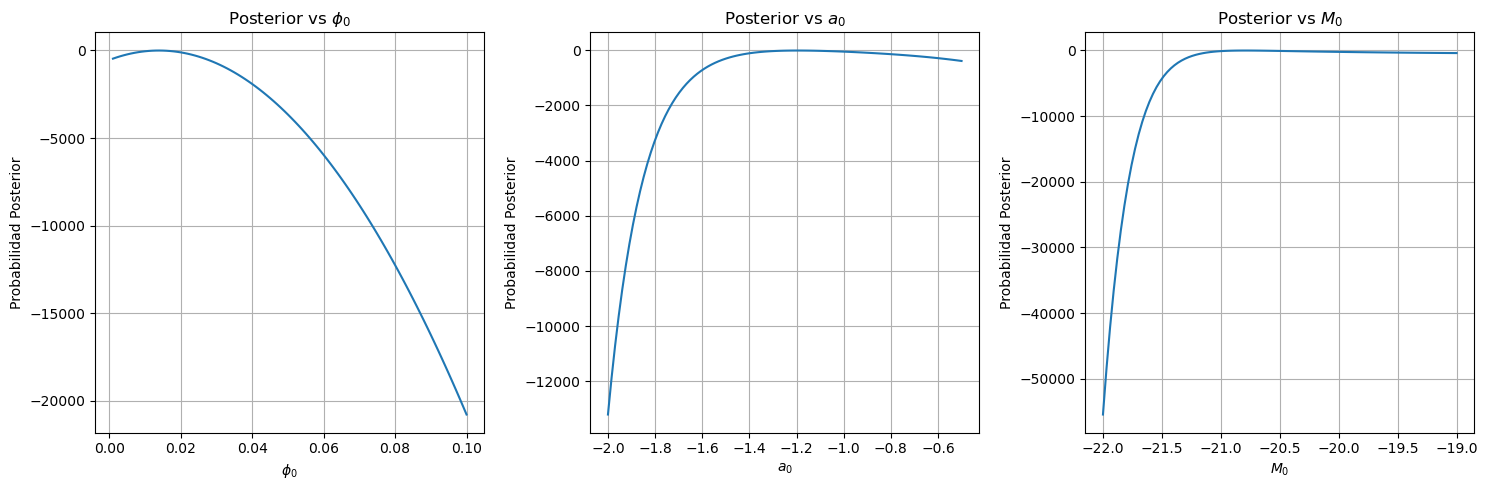

In [284]:


# Valores de ejemplo para phi0, a0 y M0
phi0_values = np.linspace(phi0lim[0], phi0lim[1], 100)
a0_values = np.linspace(alim[0], alim[1], 100)
M0_values = np.linspace(M0lim[0], M0lim[1], 100)

# Inicializar un contenedor para las probabilidades posteriores
posterior_phi0 = np.zeros_like(phi0_values)
posterior_a0 = np.zeros_like(a0_values)
posterior_M0 = np.zeros_like(M0_values)

# Evaluar la probabilidad posterior para cada valor de phi0
for i, phi0 in enumerate(phi0_values):
    posterior_phi0[i] = prob_post(y=datos['PHI'], M=datos['MAG'], phi0=phi0, a0=-1.20, M0=-20.83, sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim)

# Evaluar la probabilidad posterior para cada valor de a0
for i, a0 in enumerate(a0_values):
    posterior_a0[i] = prob_post(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=a0, M0=-20.83, sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim)

# Evaluar la probabilidad posterior para cada valor de M0
for i, M0 in enumerate(M0_values):
    posterior_M0[i] = prob_post(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=M0, sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim)

# Graficar los resultados
plt.figure(figsize=(15, 5))

# Gráfico para phi0
plt.subplot(1, 3, 1)
plt.plot(phi0_values, posterior_phi0)
plt.title(r'Posterior vs $\phi_0$')
plt.xlabel(r'$\phi_0$')
plt.ylabel('Probabilidad Posterior')
plt.grid()

# Gráfico para a0
plt.subplot(1, 3, 2)
plt.plot(a0_values, posterior_a0)
plt.title(r'Posterior vs $a_0$')
plt.xlabel(r'$a_0$')
plt.ylabel('Probabilidad Posterior')
plt.grid()

# Gráfico para M0
plt.subplot(1, 3, 3)
plt.plot(M0_values, posterior_M0)
plt.title(r'Posterior vs $M_0$')
plt.xlabel(r'$M_0$')
plt.ylabel('Probabilidad Posterior')
plt.grid()

plt.tight_layout()
plt.show()

Metropolis-Hasting:
Utilizamos las funciones antes definidas para generar el algoritmo de la cadena, donde busca un punto con una cierta probabilidad, salta a otro punto de manera aleatorea y luego evalurara la funcion likehood en este punto, el cual comparara con el punto anterior, quiero que el valor de mayor a uno, lo que indicaria que el valor es mejor, entonces lo tomo y a partir de ese punto siga recorriendo el espacio de parametros.


In [285]:
#Debo definir la funcion de metropolis hasting
# Elegimos rangos razonables basados en la literatura y el comportamiento de los datos
phi0lim = [0.001, 0.02]  # Valor de phi0 entre 1e-3 y 1e-1
M0lim = [-21.5, -20]  # Magnitud característica entre -22 y -19
alim = [-1.6, -1]  # Valor de a0 entre -2 y -0.5

a0=np.random.uniform(alim[0],alim[1])
phi0=np.random.uniform(phi0lim[0],phi0lim[1])
M0=np.random.uniform(M0lim[0],M0lim[1])
y=datos['PHI']
M=datos['MAG']
#Normalizo el a0,M0,phi0 para darle el mismo paso
#a_norm=(a0-alim[0])/(alim[1]-alim[0])
#M0_norm=(M0-M0lim[0])/(M0lim[1]-M0lim[0])
#phi0_norm=(phi0-phi0lim[0])/(phi0lim[1]-phi0lim[0])
#step=1e-2
#Ahora defino los nuevos parametros iniciales para que la funcion barra el espacio de parametros, que salte al siguiente valor
#a_nuevo=a0+np.random.uniform(-1,1)*step*(alim[1]-alim[0])
#M_nuevo=M0+np.random.uniform(-1,1)*step*(M0lim[1]-M0lim[0])
#phi0_nuevo=phi0+np.random.uniform(-1,1)*step*(phi0lim[1]-phi0lim[0])

def metropolis_hasting(y=y, M=M, phi0=phi0, a0=a0, M0=M0, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim,N_iter=10000):
    p0 = prob_post(y=y, M=M, phi0=phi0, a0=a0, M0=M0,sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)
    a0_lista=[]
    M0_lista=[]
    phi0_lista=[]
    posteriores=[]
    
    for i in range(N_iter):
        step=1e-1
        #print(i)
        #Ahora defino los nuevos parametros iniciales para que la funcion barra el espacio de parametros, que salte al siguiente valor
        a_nuevo=a0+np.random.uniform(-1,1)*step*(alim[1]-alim[0])
        M_nuevo=M0+np.random.uniform(-1,1)*step*(M0lim[1]-M0lim[0])
        phi0_nuevo=phi0+np.random.uniform(-1,1)*step*(phi0lim[1]-phi0lim[0])
        p_nueva=prob_post(y=y, M=M, phi0=phi0_nuevo, a0=a_nuevo, M0=M_nuevo,sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)
        #print(p0,p_nueva,p_nueva-p0)
        if p_nueva-p0>=0:
            a0=a_nuevo
            M0=M_nuevo
            phi0=phi0_nuevo
            p0=p_nueva
        else:
            u = p_nueva-p0
            r = np.log(np.random.rand())
            #print(u,r)
            if r<u:
                a0=a_nuevo
                M0=M_nuevo
                phi0=phi0_nuevo
                p0=p_nueva
            #Si no se cumple esta condicion, no quiero que haga nada, me quedo en donde estoy
        a0_lista.append(a0)
        M0_lista.append(M0)
        phi0_lista.append(phi0)
        posteriores.append(p0)
    return(a0_lista,M0_lista,phi0_lista,posteriores)
#print(a0,M0,phi0)
#metropolis_hasting(y=datos['PHI'], M=datos['MAG'], phi0=phi0, a0=a0, M0=M0, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)

In [286]:
# Llamar a la función metropolis_hasting y obtener los resultados en variables
a0_lista, M0_lista, phi0_lista, posteriores = metropolis_hasting(
    y=datos['PHI'], M=datos['MAG'], phi0=phi0, a0=a0, M0=M0, 
    sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim, N_iter=2000
)

/tmp/ipykernel_92095/1046074793.py:3: RuntimeWarning: divide by zero encountered in log
  log_pos=log_likelihood(y, M, phi0, a0, M0, sigma)+np.log(prior(phi0, a0, M0,phi0lim, M0lim, alim))


<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_92095/4042897417.py:7: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Evolución de $\phi_0$ en función de $a_0$ (Metropolis-Hastings)')
/tmp/ipykernel_92095/4042897417.py:11: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Evolución de $M_0$  en función de $\phi_0$ (Metropolis-Hastings)')


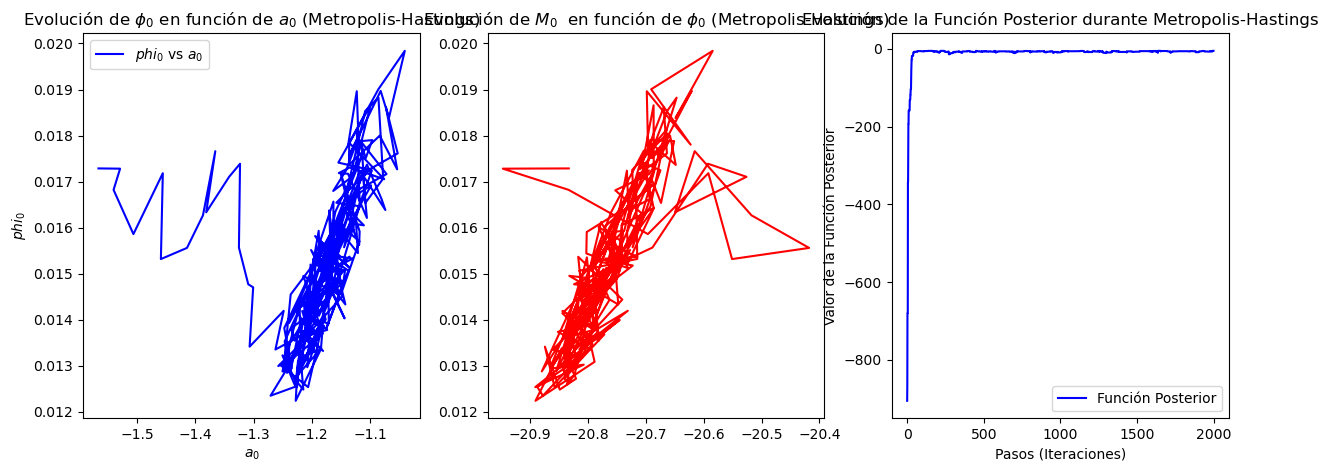

In [287]:

# Graficar phi0 vs a0
plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.plot(a0_lista, phi0_lista, label=r'$phi_0$ vs $a_0$', color='b')
plt.xlabel(r'$a_0$')
plt.ylabel(r'$phi_0$')
plt.title('Evolución de $\phi_0$ en función de $a_0$ (Metropolis-Hastings)')
plt.legend()
plt.subplot(1, 4, 2)
plt.plot(M0_lista, phi0_lista, label=r'$M_0$ vs $phi_0$', color='r')
plt.title('Evolución de $M_0$  en función de $\phi_0$ (Metropolis-Hastings)')
# Graficar la función posterior en función de los pasos
plt.subplot(1, 4, 3)
plt.plot(posteriores, label="Función Posterior", color='blue')
plt.xlabel("Pasos (Iteraciones)")
plt.ylabel("Valor de la Función Posterior")
plt.title("Evolución de la Función Posterior durante Metropolis-Hastings")

plt.legend()
plt.show()


Observamos que las cadenas caminan y convergen a una cierta region del grafico, lo cual es algo que esperamos, ademas la funcion posterior tiene una tendencia de convergencia.

Ejercicio 3 y 4:
Queremos visualizar las propiedades de convergencia de las cadenas y analizar la eleccion de parametros que produzcan un buen mezclado de las cadenas, de manera que corremos varias cadenas.
Quiero crear muchas cadenas que surjan de distintas regiones y ver la convergencia de esas cadenas.

/tmp/ipykernel_92095/1046074793.py:3: RuntimeWarning: divide by zero encountered in log
  log_pos=log_likelihood(y, M, phi0, a0, M0, sigma)+np.log(prior(phi0, a0, M0,phi0lim, M0lim, alim))


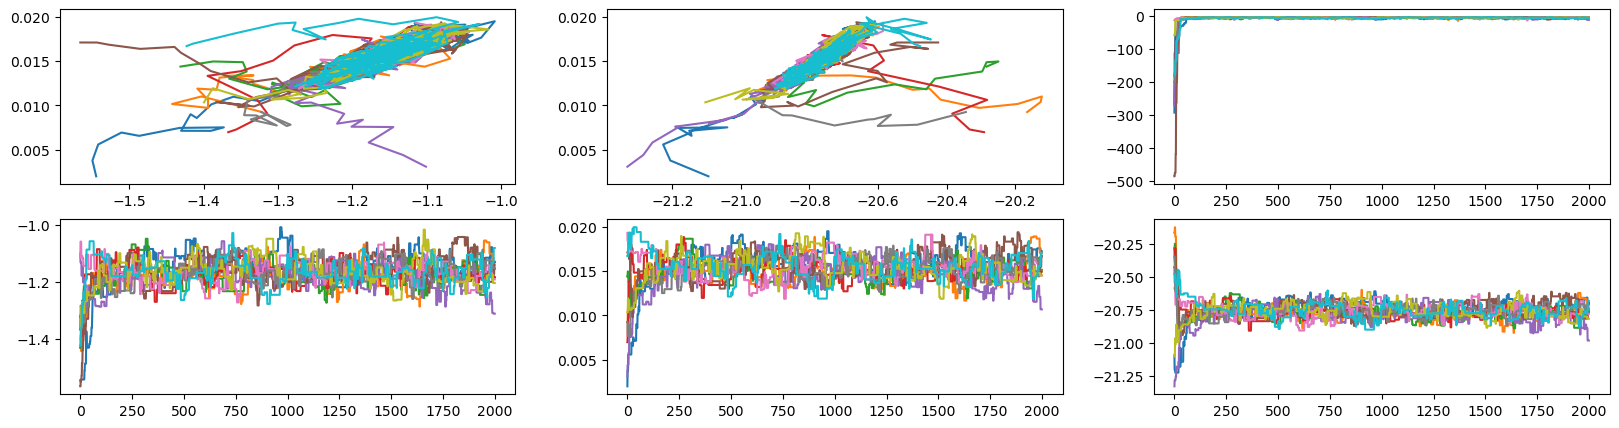

In [288]:
#Generamos aleatoriamente parametros para construir la cadena, teniendo en cuenta los parametros iniciales
fig, axs = plt.subplots(2,3,figsize=(20, 5))

N=10
for i in range(N):
    a0=np.random.uniform(alim[0],alim[1])
    phi0=np.random.uniform(phi0lim[0],phi0lim[1])
    M0=np.random.uniform(M0lim[0],M0lim[1])
    a0_lista, M0_lista, phi0_lista, posteriores = metropolis_hasting(
    y=datos['PHI'], M=datos['MAG'], phi0=phi0, a0=a0, M0=M0, 
    sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim, N_iter=2000
    )
    # Graficar phi0 vs a0
    axs[0,0].plot(a0_lista, phi0_lista, label=f'cadena_{i}')
    axs[0,1].plot(M0_lista, phi0_lista, label=f'cadena_{i}')
    axs[0,2].plot(posteriores, label="Función Posterior")
    axs[1,0].plot(a0_lista)
    axs[1,1].plot(phi0_lista)
    axs[1,2].plot(M0_lista)    

Observamos que todos inician del mismo punto y convergen al mismo punto, esto es esperado dado que se tiene un solo maximo.
Bastaria ver con malos mezclados y comparar con las mezclas buenas.

/tmp/ipykernel_92095/1046074793.py:3: RuntimeWarning: divide by zero encountered in log
  log_pos=log_likelihood(y, M, phi0, a0, M0, sigma)+np.log(prior(phi0, a0, M0,phi0lim, M0lim, alim))


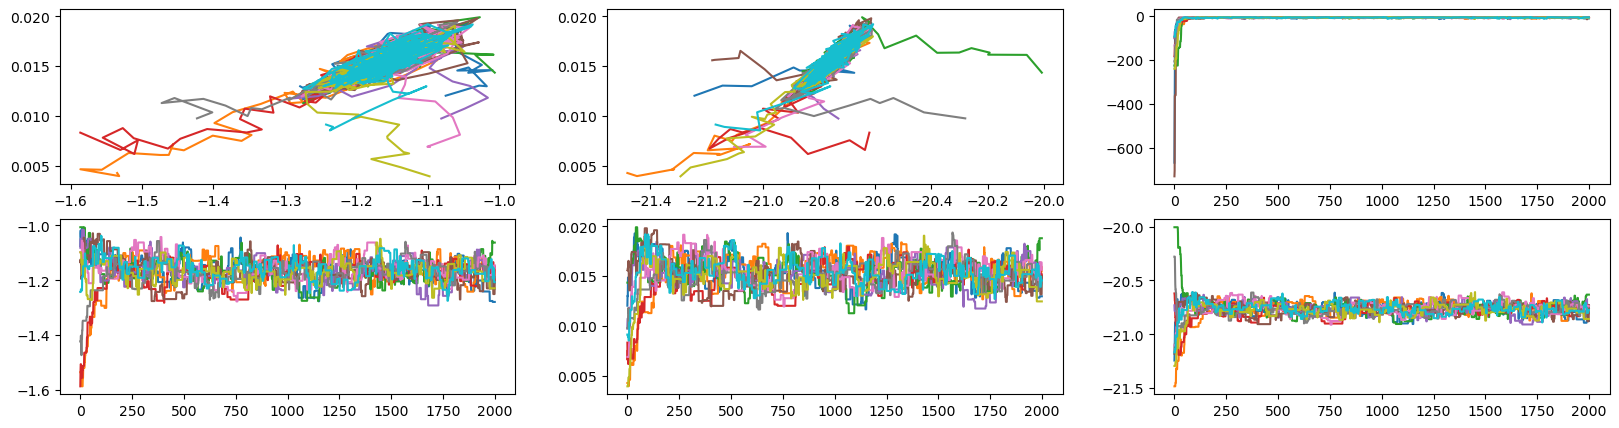

In [289]:
fig, axs = plt.subplots(2,3,figsize=(20, 5))

N=10
for i in range(N):
    a0=np.random.uniform(alim[0],alim[1])
    phi0=np.random.uniform(phi0lim[0],phi0lim[1])
    M0=np.random.uniform(M0lim[0],M0lim[1])
    a0_lista, M0_lista, phi0_lista, posteriores = metropolis_hasting(
    y=datos['PHI'], M=datos['MAG'], phi0=phi0, a0=a0, M0=M0, 
    sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim, N_iter=2000
    )
    # Graficar phi0 vs a0
    axs[0,0].plot(a0_lista, phi0_lista, label=f'cadena_{i}')
    axs[0,1].plot(M0_lista, phi0_lista, label=f'cadena_{i}')
    axs[0,2].plot(posteriores, label="Función Posterior")
    axs[1,0].plot(a0_lista)
    axs[1,1].plot(phi0_lista)
    axs[1,2].plot(M0_lista) 

/tmp/ipykernel_92095/1046074793.py:3: RuntimeWarning: divide by zero encountered in log
  log_pos=log_likelihood(y, M, phi0, a0, M0, sigma)+np.log(prior(phi0, a0, M0,phi0lim, M0lim, alim))


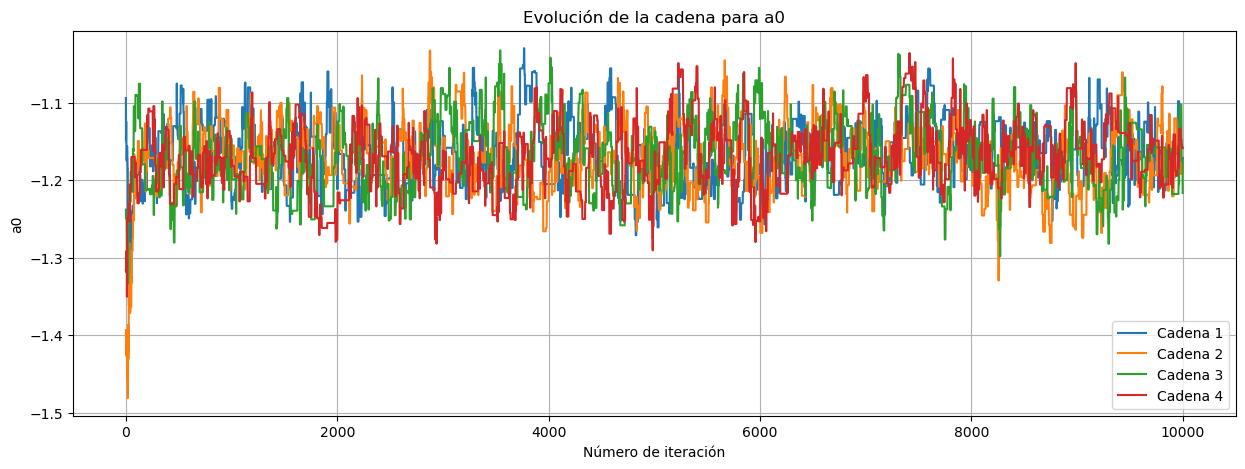

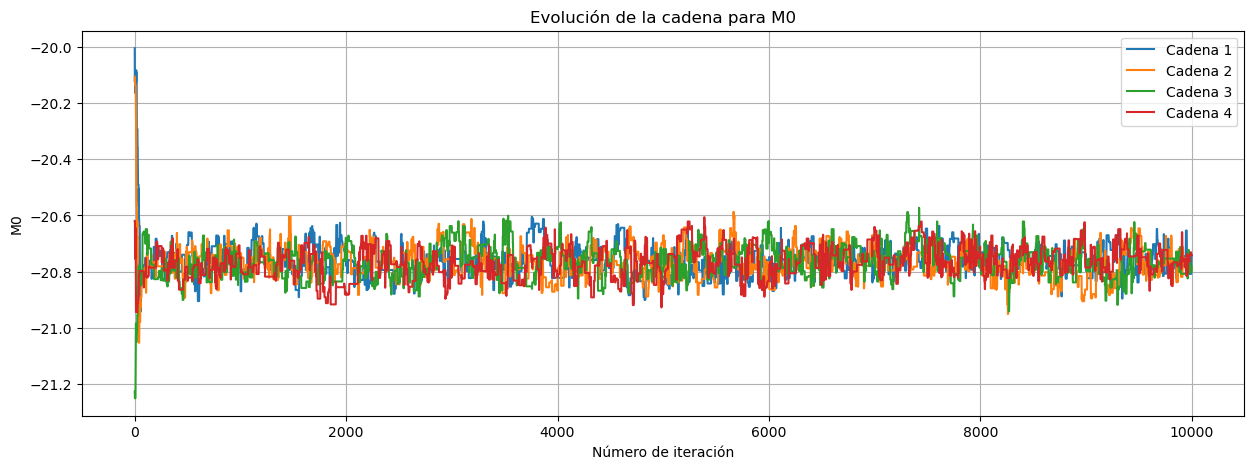

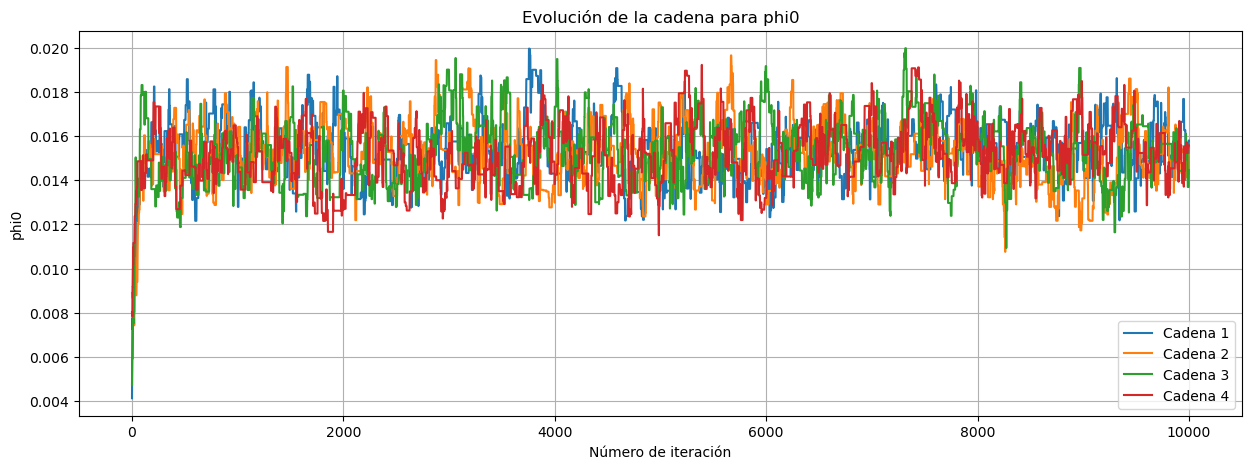

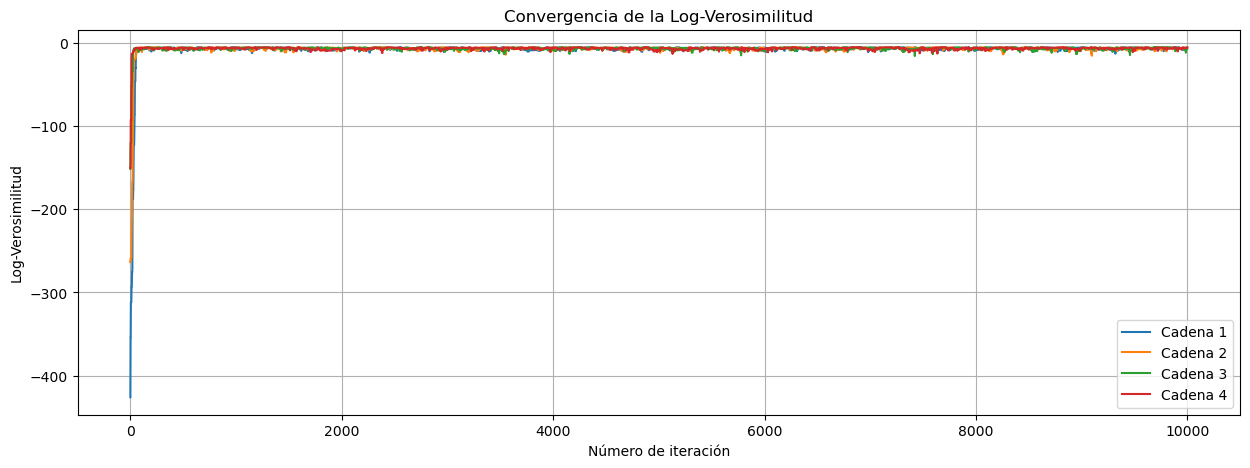

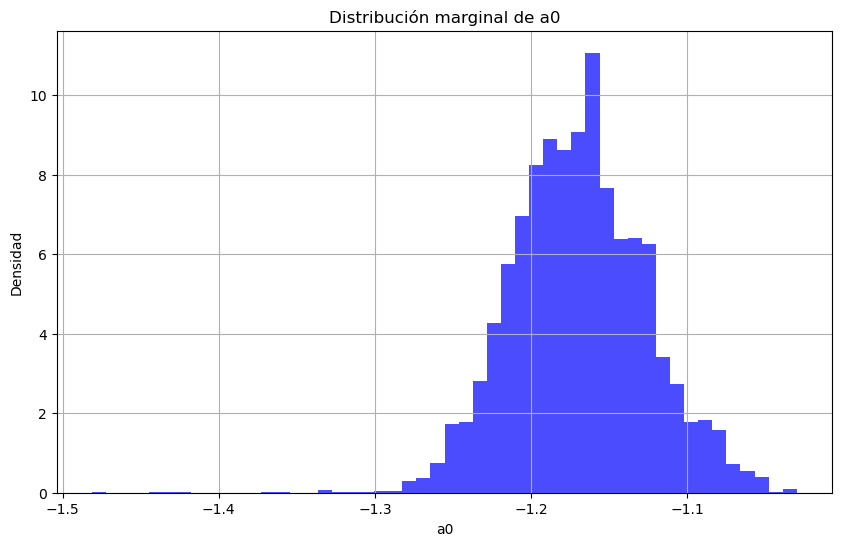

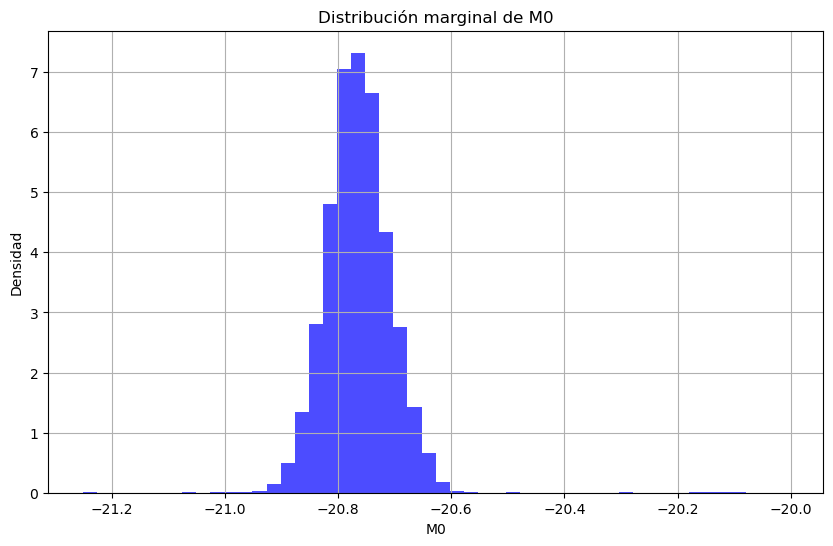

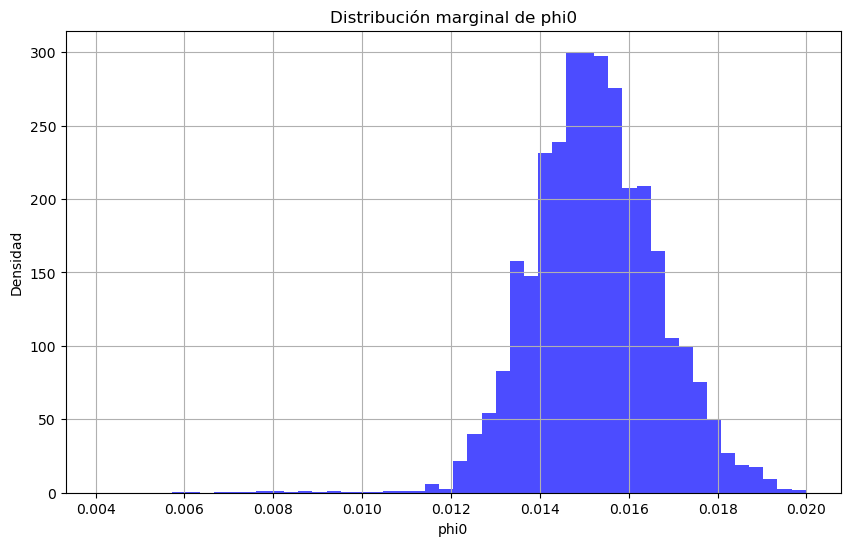

In [294]:
import numpy as np
import matplotlib.pyplot as plt

# Vamos a generar varias cadenas con distintas condiciones iniciales
def multiple_chains(y, M, sigma, phi0lim, M0lim, alim, N_iter=10000, N_chains=4):
    chains = []
    for _ in range(N_chains):
        # Inicializar parámetros aleatorios para cada cadena
        a0 = np.random.uniform(alim[0], alim[1])
        phi0 = np.random.uniform(phi0lim[0], phi0lim[1])
        M0 = np.random.uniform(M0lim[0], M0lim[1])
        
        # Generar la cadena utilizando Metropolis-Hastings
        chain = metropolis_hasting(y, M, phi0, a0, M0, sigma, phi0lim, M0lim, alim, N_iter)
        
        # Almacenar la cadena
        chains.append(chain)
    
    return chains

# Función para visualizar el comportamiento de las cadenas
def visualize_chains(chains, param_name, param_values, N_chains):
    plt.figure(figsize=(15, 5))
    
    for i in range(N_chains):
        # Graficar la evolución del parámetro en la cadena
        plt.plot(range(len(chains[i][param_name])), chains[i][param_name], label=f'Cadena {i+1}')
    
    plt.title(f'Evolución de la cadena para {param_name}')
    plt.xlabel('Número de iteración')
    plt.ylabel(f'{param_name}')
    plt.legend()
    plt.grid()
    plt.show()

# Función para visualizar la convergencia de la log-verosimilitud
def visualize_likelihood_convergence(chains, N_chains):
    plt.figure(figsize=(15, 5))
    
    for i in range(N_chains):
        # Graficar la log-verosimilitud para cada cadena
        plt.plot(range(len(chains[i]['log_likelihood'])), chains[i]['log_likelihood'], label=f'Cadena {i+1}')
    
    plt.title(f'Convergencia de la Log-Verosimilitud')
    plt.xlabel('Número de iteración')
    plt.ylabel('Log-Verosimilitud')
    plt.legend()
    plt.grid()
    plt.show()

# Función para graficar la distribución marginal de los parámetros
def plot_marginal_distribution(param_name, param_values):
    plt.figure(figsize=(10, 6))
    plt.hist(param_values, bins=50, density=True, alpha=0.7, color='b')
    plt.title(f'Distribución marginal de {param_name}')
    plt.xlabel(f'{param_name}')
    plt.ylabel('Densidad')
    plt.grid()
    plt.show()

# Función de Metropolis-Hastings modificada para incluir el retorno de las cadenas
def metropolis_hasting(y, M, phi0, a0, M0, sigma, phi0lim, M0lim, alim, N_iter=10000):
    p0 = prob_post(y=y, M=M, phi0=phi0, a0=a0, M0=M0, sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim)
    a0_lista = []
    M0_lista = []
    phi0_lista = []
    log_likelihood_lista = []
    posteriores = []
    
    for i in range(N_iter):
        # Definir nuevos parámetros aleatorios
        step = 1e-1
        a_nuevo = a0 + np.random.uniform(-1, 1) * step * (alim[1] - alim[0])
        M_nuevo = M0 + np.random.uniform(-1, 1) * step * (M0lim[1] - M0lim[0])
        phi0_nuevo = phi0 + np.random.uniform(-1, 1) * step * (phi0lim[1] - phi0lim[0])
        
        # Calcular la probabilidad posterior para los nuevos parámetros
        p_nueva = prob_post(y=y, M=M, phi0=phi0_nuevo, a0=a_nuevo, M0=M_nuevo, sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim)
        
        # Aceptar o rechazar el nuevo estado
        if p_nueva - p0 >= 0:
            a0, M0, phi0, p0 = a_nuevo, M_nuevo, phi0_nuevo, p_nueva
        else:
            u = p_nueva - p0
            r = np.log(np.random.rand())
            if r < u:
                a0, M0, phi0, p0 = a_nuevo, M_nuevo, phi0_nuevo, p_nueva
        
        # Guardar los parámetros y la log-verosimilitud
        a0_lista.append(a0)
        M0_lista.append(M0)
        phi0_lista.append(phi0)
        log_likelihood_lista.append(log_likelihood(y, M, phi0, a0, M0, sigma))
    
    # Retornar las cadenas
    chain = {
        'a0': a0_lista,
        'M0': M0_lista,
        'phi0': phi0_lista,
        'log_likelihood': log_likelihood_lista
    }
    return chain

# Ejemplo de uso de la simulación y visualización
# Primero, generamos varias cadenas
chains = multiple_chains(y=datos['PHI'], M=datos['MAG'], sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim, N_iter=10000, N_chains=4)

# Visualizamos las propiedades de convergencia para cada parámetro
visualize_chains(chains, 'a0', alim, N_chains=4)
visualize_chains(chains, 'M0', M0lim, N_chains=4)
visualize_chains(chains, 'phi0', phi0lim, N_chains=4)

# Visualizamos la convergencia de la log-verosimilitud
visualize_likelihood_convergence(chains, N_chains=4)

# Graficamos la distribución marginal de cada parámetro
plot_marginal_distribution('a0', np.concatenate([chain['a0'] for chain in chains]))
plot_marginal_distribution('M0', np.concatenate([chain['M0'] for chain in chains]))
plot_marginal_distribution('phi0', np.concatenate([chain['phi0'] for chain in chains]))


Ahora queremos implementar el metodo de gradiente descendente.
El gradiente descendente es un método iterativo utilizado para encontrar el mínimo (o máximo) de una función, se emplea para minimizar la verosimilitud marginalizada respecto a cada parámetro. Calculo la derivada y me muevo en una direccion.
Eficiencia en Cálculo: El gradiente descendente es eficiente en problemas de alta dimensionalidad, especialmente cuando se desea minimizar una función compleja como la verosimilitud.
Adaptabilidad: Es un método flexible que se adapta bien a problemas no lineales o que tienen funciones de verosimilitud no convexas.
El método de gradiente descendente se basa en la idea de ir "caminando" en la dirección de mayor descenso en la función, que se define por el gradiente (la derivada de la función con respecto a los parámetros). En cada iteración del método:

Se calcula el gradiente de la función (en este caso, la verosimilitud marginalizada) con respecto a cada parámetro.
Se actualizan los valores de los parámetros en la dirección negativa del gradiente, reduciendo gradualmente el valor de la función.

In [295]:
# Asumimos que la función 'metropolis_hasting' retorna un diccionario
# que contiene las cadenas generadas, con las claves correctas.
# Esto asegura que podamos indexar correctamente los parámetros.

# Inicializamos varias cadenas con diferentes puntos de partida
N_chains = 3  # Número de cadenas
N_iter = 10000  # Número de iteraciones por cadena

# Almacenamos las cadenas
chains = []
for i in range(N_chains):
    # Inicializamos parámetros aleatorios para cada cadena
    phi0_ini = np.random.uniform(phi0lim[0], phi0lim[1])
    a0_ini = np.random.uniform(alim[0], alim[1])
    M0_ini = np.random.uniform(M0lim[0], M0lim[1])
    
    # Llamamos al algoritmo de Metropolis-Hastings para cada cadena
    chain = metropolis_hasting(y=datos['PHI'], M=datos['MAG'], phi0=phi0_ini, a0=a0_ini, M0=M0_ini, sigma=sigma, 
                               phi0lim=phi0lim, M0lim=M0lim, alim=alim, N_iter=N_iter)
    chains.append(chain)

# Visualización: Likelihood vs. phi0
plt.figure(figsize=(10, 6))
for chain in chains:
    plt.plot(chain['phi0'], chain['posteriores'], label='Chain')
plt.xlabel(r'$\phi_0$')
plt.ylabel('Log-Posterior')
plt.legend()
plt.title('Likelihood vs. $\\phi_0$')  # Usar '\\' para evitar la advertencia
plt.grid(True)
plt.show()

# Visualización: Parámetro vs eslabón de la cadena
plt.figure(figsize=(10, 6))
for chain in chains:
    plt.plot(chain['a0'], label='a0')
    plt.plot(chain['M0'], label='M0')
    plt.plot(chain['phi0'], label='phi0')
plt.xlabel('Iteración')
plt.ylabel('Valor del parámetro')
plt.legend()
plt.title('Valor de parámetros vs iteración')
plt.grid(True)
plt.show()

# Visualización: Distribución marginal de phi0
plt.figure(figsize=(10, 6))
for chain in chains:
    plt.hist(chain['phi0'], bins=30, alpha=0.5, label='Chain')
plt.xlabel(r'$\phi_0$')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Distribución marginal de $\\phi_0$')  # Usar '\\' para evitar la advertencia
plt.grid(True)
plt.show()

# Visualización: Curvas de nivel
plt.figure(figsize=(8, 6))
# Usamos una malla de puntos en el espacio de parámetros
phi0_grid, a0_grid = np.meshgrid(np.linspace(phi0lim[0], phi0lim[1], 50), np.linspace(alim[0], alim[1], 50))
posterior_grid = np.zeros_like(phi0_grid)

for i in range(len(phi0_grid)):
    for j in range(len(a0_grid)):
        posterior_grid[i, j] = prob_post(y=datos['PHI'], M=datos['MAG'], phi0=phi0_grid[i, j], a0=a0_grid[i, j], M0=-20.83, sigma=sigma, 
                                        phi0lim=phi0lim, M0lim=M0lim, alim=alim)

# Graficamos las curvas de nivel
plt.contour(phi0_grid, a0_grid, posterior_grid, 20)
plt.xlabel(r'$\phi_0$')
plt.ylabel(r'$a_0$')
plt.title('Curvas de Nivel de la Función de Likelihood')
plt.show()

# Calcular la máxima separación entre cadenas en función del número de iteraciones
separation = np.zeros(N_iter)

for i in range(N_iter):
    # Calculamos la distancia entre las cadenas en cada paso
    distances = np.zeros(N_chains)
    for j in range(N_chains):
        distances[j] = np.linalg.norm(np.array([chains[j]['phi0'][i], chains[j]['a0'][i], chains[j]['M0'][i]]))
    separation[i] = np.max(distances)

# Visualizar la máxima separación
plt.figure(figsize=(10, 6))
plt.plot(separation)
plt.xlabel('Iteración')
plt.ylabel('Máxima separación entre cadenas')
plt.title('Máxima separación entre cadenas vs Iteración')
plt.grid(True)
plt.show()

/tmp/ipykernel_92095/1046074793.py:3: RuntimeWarning: divide by zero encountered in log
  log_pos=log_likelihood(y, M, phi0, a0, M0, sigma)+np.log(prior(phi0, a0, M0,phi0lim, M0lim, alim))


KeyError: 'posteriores'

<Figure size 1000x600 with 0 Axes>